## Exploratory Data Analysis


Load the dataset in Python environment

In [437]:
# import the following libraries into the Python environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [439]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [440]:
# Dropping 'Region' and 'Channel' columns as they are not needed for further analysis
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [441]:
data.shape

(440, 6)

In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [443]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [444]:
data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Missing value handling is not required as the dataset has no missing values**

In [445]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


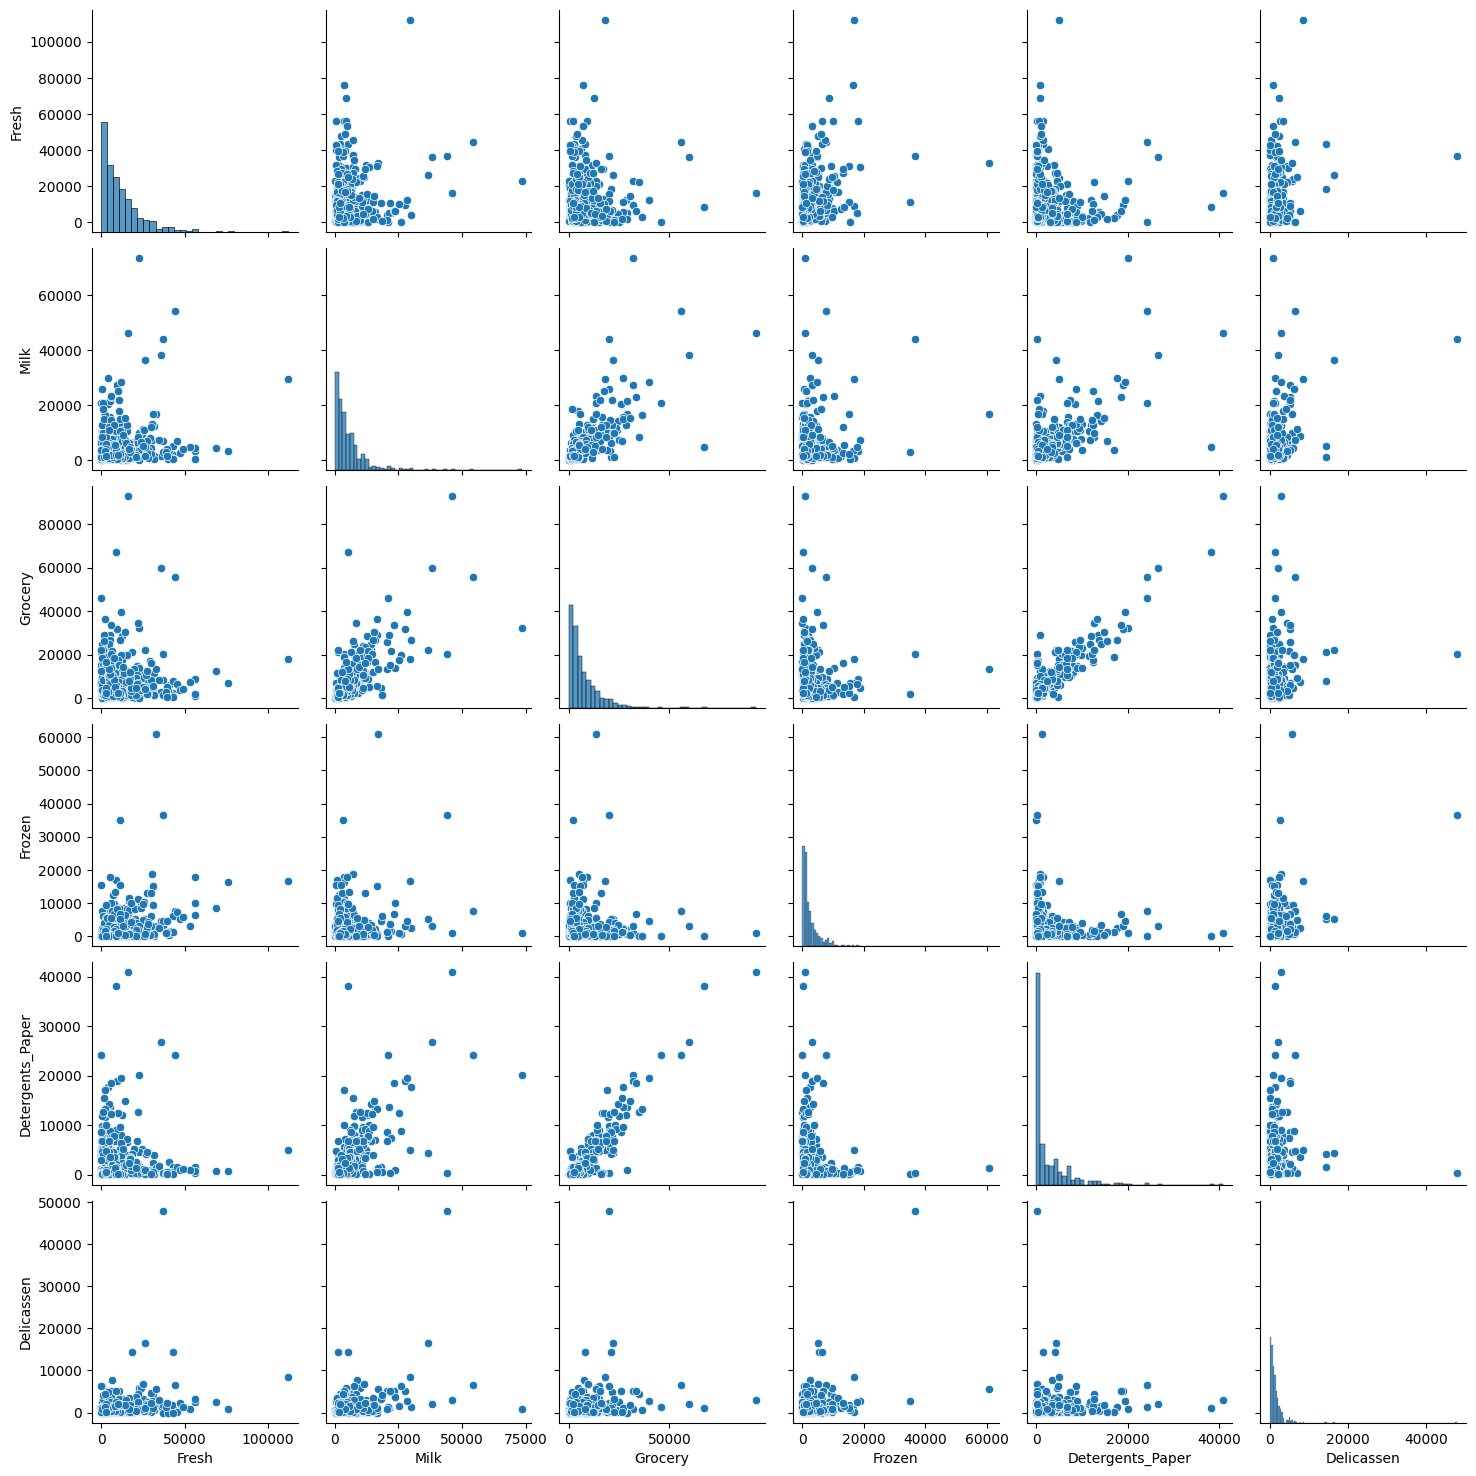

In [446]:
sns.pairplot(data)

## Outlier Handling

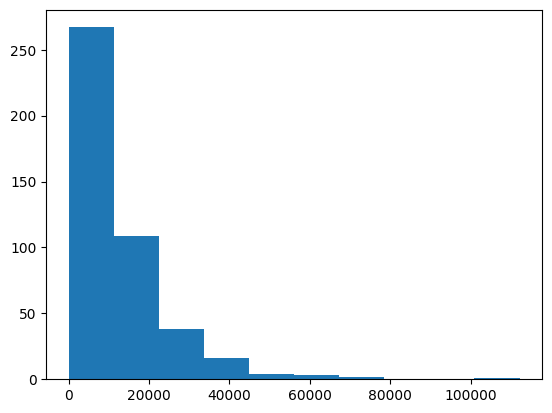

In [447]:
plt.hist(data['Fresh'])
plt.show()

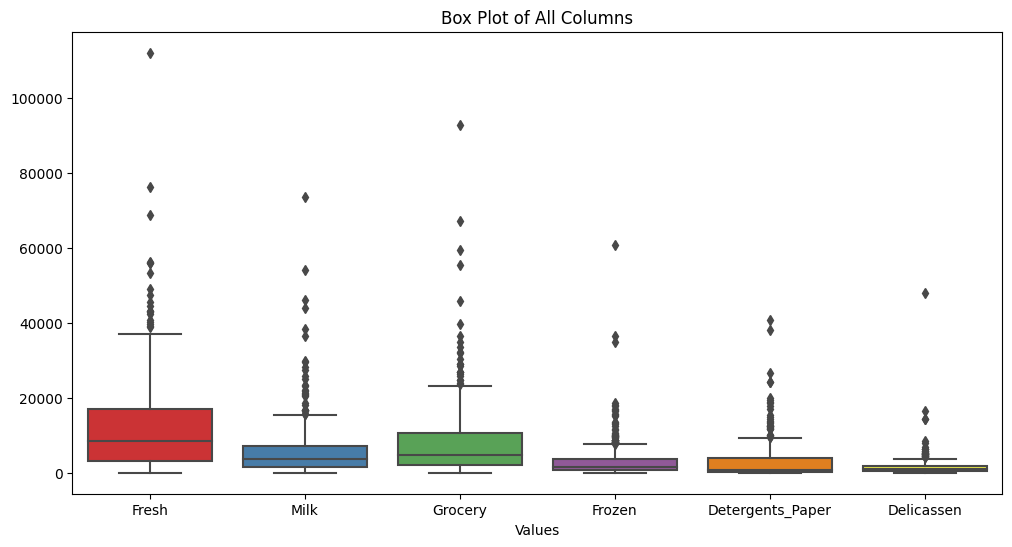

In [448]:
plt.figure(figsize=(12, 6))
sns.boxplot(data, orient='v', palette='Set1')
plt.title('Box Plot of All Columns')
plt.xlabel('Values')
plt.show()

In [449]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [450]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [451]:
# Exclude 'Channel' and 'Region' columns from outlier handling

columns_to_exclude = ['Channel', 'Region']

In [452]:
# Iterate through columns for outlier handling
for column in data.columns:
    if column not in columns_to_exclude:
        tenth_percentile = np.percentile(data[column], 10)
        ninetieth_percentile = np.percentile(data[column], 90)
        data[column] = np.where(data[column] < tenth_percentile, tenth_percentile, data[column])
        data[column] = np.where(data[column] > ninetieth_percentile, ninetieth_percentile, data[column])


In [453]:
# Replace outliers in the current column with corresponding percentiles
data[column] = np.where(data[column] < tenth_percentile, tenth_percentile, data[column])
data[column] = np.where(data[column] > ninetieth_percentile, ninetieth_percentile, data[column])


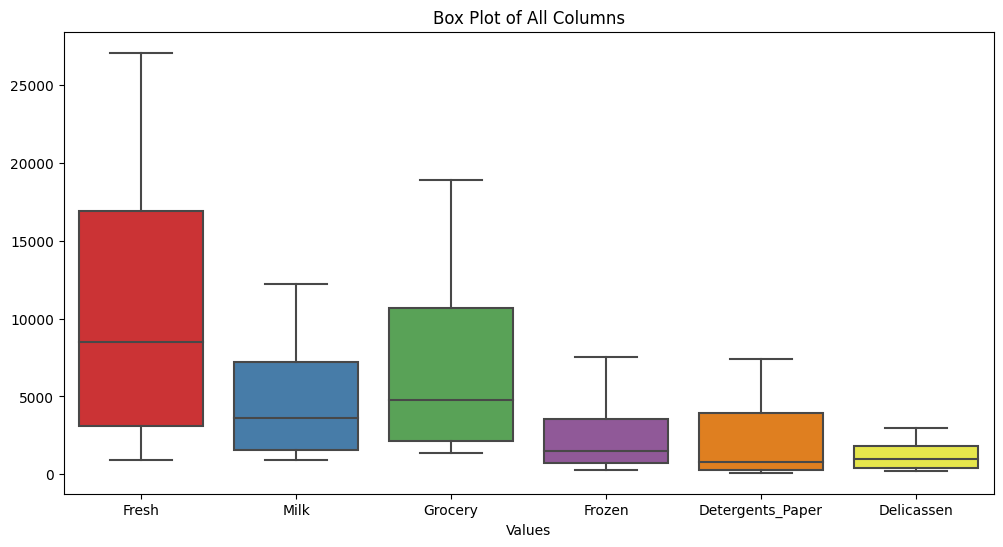

In [454]:
plt.figure(figsize=(12, 6))
sns.boxplot(data, orient='v', palette='Set1')
plt.title('Box Plot of All Columns')
plt.xlabel('Values')
plt.show()

In [455]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,10692.300909,4812.388182,6955.945455,2497.912273,2233.576364,1203.265455
std,8568.874228,3765.147470,5786.789199,2346.444798,2577.941760,911.251394
min,915.600000,889.800000,1381.900000,281.300000,99.600000,180.800000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,27090.500000,12229.900000,18910.100000,7545.300000,7438.300000,2945.900000


In [456]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,281.3,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9


In [457]:
data.dtypes

Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

**Encoding not required; dataset already contains only numeric features**

## Scaling

In [458]:
from sklearn.preprocessing import MinMaxScaler

In [459]:
scaler = MinMaxScaler()

In [460]:
columns_to_exclude = ['Channel', 'Region']

In [461]:
for column in data.columns:
  if column not in columns_to_exclude:
      data[column] = scaler.fit_transform(data[[column]])

In [462]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000


# Modelling


In [465]:
x=data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

In [466]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000


# KMeans Clustering

In [467]:
from sklearn.cluster import KMeans

In [468]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=20)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [469]:
wcss

[290.94761362918797,
 182.81268847217325,
 143.70895676833047,
 125.33920238376683,
 111.87526918491442,
 101.07880431727278,
 91.54220412089731,
 84.91860589680871,
 79.33374964868985,
 75.0960729258721]

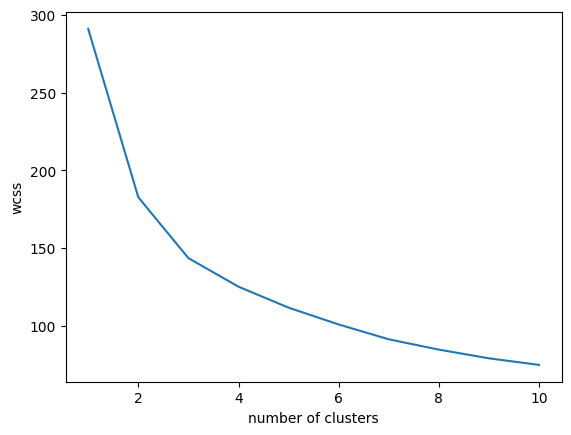

In [470]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel('wcss')
plt.show()

In [471]:
km=KMeans(n_clusters=3,n_init=20)

In [472]:
km.fit(x)

KMeans(n_clusters=3, n_init=20)

In [473]:
cluster_labels=km.predict(x)

In [474]:
cluster_labels

array([1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,

In [475]:
pd.Series(cluster_labels).value_counts()

2    210
1    121
0    109
dtype: int64

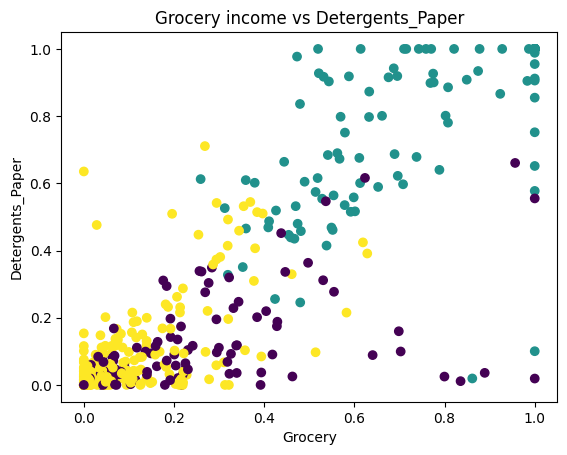

In [476]:
plt.scatter(x['Grocery'],x['Detergents_Paper'],c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Grocery income vs Detergents_Paper')
plt.show()

In [477]:
cluster_indices=np.where(cluster_labels==0)[0]

In [478]:
cluster_indices

array([  3,   4,  17,  18,  20,  22,  30,  33,  36,  39,  40,  41,  52,
        54,  68,  70,  71,  73,  75,  87,  89,  91,  93, 103, 112, 118,
       124, 125, 126, 127, 129, 136, 138, 140, 141, 142, 149, 176, 177,
       179, 180, 181, 183, 190, 195, 196, 202, 210, 226, 229, 230, 234,
       237, 239, 240, 241, 252, 253, 254, 255, 258, 259, 265, 267, 273,
       276, 278, 281, 282, 283, 284, 287, 294, 300, 310, 311, 324, 325,
       328, 332, 334, 335, 337, 339, 347, 354, 358, 370, 371, 373, 377,
       380, 381, 382, 384, 393, 401, 403, 404, 406, 409, 413, 421, 422,
       425, 427, 431, 435, 436])

In [479]:
data['Cluster_Labels']=cluster_labels

In [480]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_Labels
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502,1
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905,1
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000,1
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245,0
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000,0


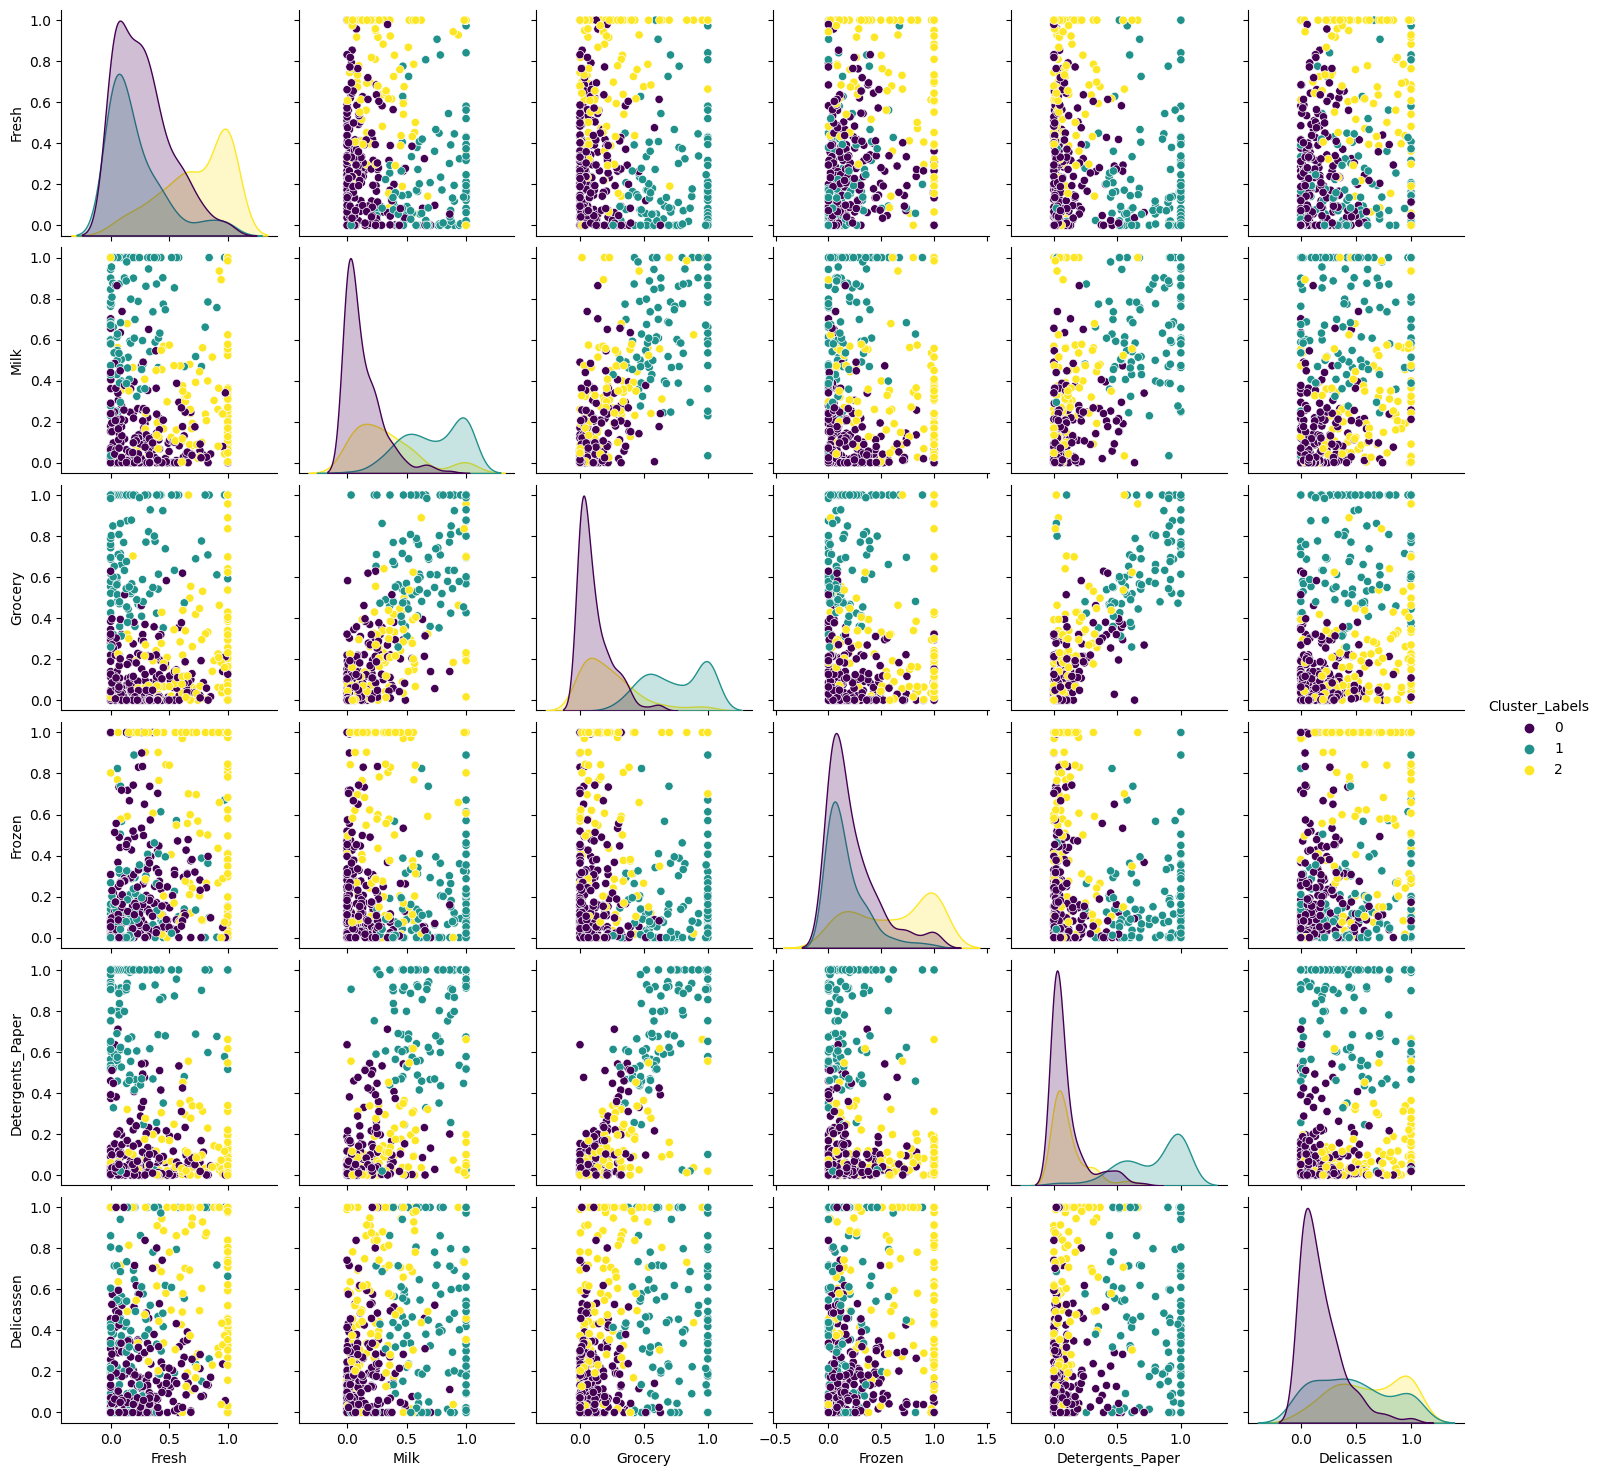

In [360]:
import seaborn as sns
sns.pairplot(data, hue='Cluster_Labels', palette='viridis')
plt.show()

In [481]:
from sklearn.metrics import silhouette_score

In [482]:
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5532140577766463


# Agglomerative Hierarchical Clustering

In [364]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [367]:
data.drop(['Cluster_Labels'], axis = 1, inplace = True)

In [368]:
x=data

In [369]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000


In [483]:
mergings = linkage(x,method="complete")

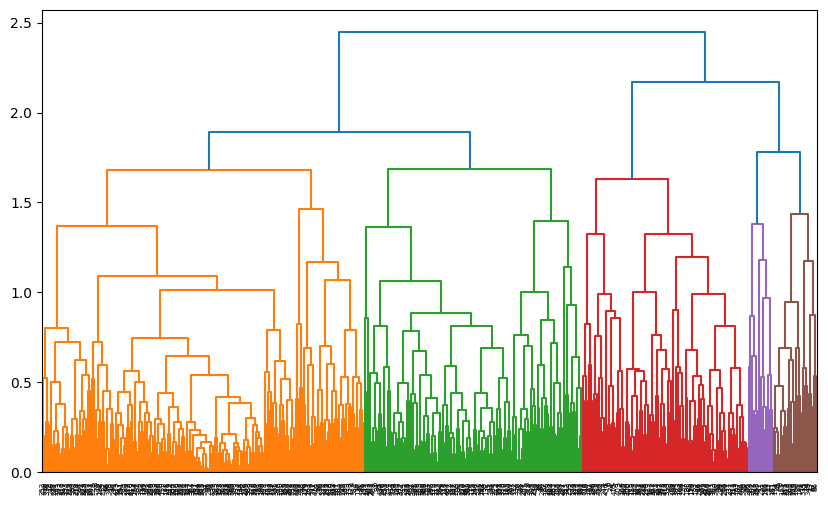

In [484]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [494]:
cluster_labels = fcluster(mergings, 0.5, criterion="distance")

In [495]:
cluster_labels

array([ 68,  66,  70,  51,  33,  68,  37,  69,  10, 101,  61,  47, 107,
       108, 106,  47,  87,  27,  34,  11,  31,  15,  53,  99, 107,  37,
        46,  47, 101,  41,  34,  14,  42,  56,  16,  11,  28,  85,  89,
        53,  54,  34,  79,  89,  82, 101,  91,  98,  75,  91,  25,  20,
        40,  86,  41,  10,  91,  87,  47,  68,  11, 109,  63,  91,   6,
        89,  11, 108,  23,  17,  51, 100,   3,  58,  68,  45,   2,  90,
        17,  12,  17,  86,  66,  44,  37, 104, 110,  54,   4,  28,  46,
        51,  96,  50,  81,  14,  11,  16,  16,   5, 105, 101,  74,  55,
        47,  49,  72,  91,  19,  84,  49,  90,  50,  49,  44,  46,  17,
        14,  45,  15,  44,  15,  46,  83,  29,  56,  59,  34,  18,  41,
         4,  16,  47,  17,  17,  17,  63,  20,  32,  14,  34,  35,  57,
         4,  47, 104,  17,  17,  15,  41,  49,  12,  46,  19,  16, 101,
       103,  46,  73,  86,  73,  26,  44,  88,  82,  96,  70,  14,  17,
        15,  86, 101,  10,  78,  13,  73,  58,  32,  21,  25,  3

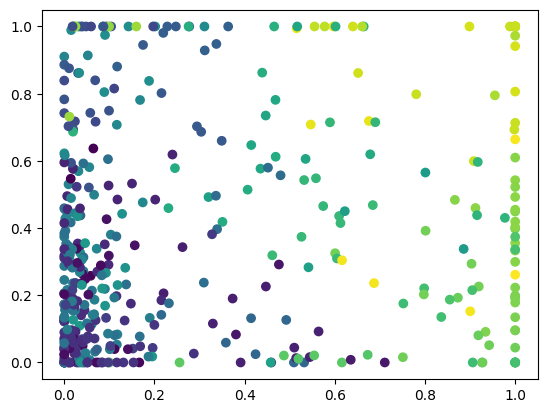

In [496]:
plt.scatter(x['Detergents_Paper'],x['Delicassen'],c=cluster_labels)

plt.show()

# PCA

In [381]:
data.mean()

Fresh               0.373514
Milk                0.345904
Grocery             0.318004
Frozen              0.305150
Detergents_Paper    0.290784
Delicassen          0.369775
dtype: float64

In [382]:
data.var()

Fresh               0.107171
Milk                0.110238
Grocery             0.108994
Frozen              0.104344
Detergents_Paper    0.123398
Delicassen          0.108606
dtype: float64

In [390]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [383]:
from sklearn.preprocessing import scale

In [384]:
x = pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [385]:
from sklearn.decomposition import PCA

In [386]:
pca=PCA()

In [387]:
pc_array=pca.fit_transform(x)

In [388]:
pc_array.shape

(440, 6)

In [393]:
pc_data1=pd.DataFrame(pc_array,columns=["pc1","pc2","pc3","pc4","pc5","pc6"])

In [394]:
pc_data1

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.976053,-0.150858,-0.814413,-0.061369,-0.989046,-0.218828
1,1.427301,0.087466,-0.036555,0.480462,-0.724402,-0.111564
2,1.389204,0.839725,-0.106375,1.535950,-0.359408,-0.426605
3,-1.303227,1.383238,0.879169,0.387606,0.574358,0.117565
4,0.132783,2.254697,-0.746426,0.581606,0.167217,-0.071794
...,...,...,...,...,...,...
435,1.125856,3.377892,0.523303,-0.887795,-1.121592,1.149538
436,-1.611279,2.208222,-0.823183,0.152993,0.402953,-0.270094
437,3.570422,0.344172,-0.783907,-0.522608,-0.028930,-0.060822
438,-1.001165,0.109771,-0.842646,1.249980,0.082924,-0.009148


In [395]:
pc_data1.corr().round(1)

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0
pc2,-0.0,1.0,0.0,-0.0,-0.0,-0.0
pc3,-0.0,0.0,1.0,-0.0,-0.0,-0.0
pc4,-0.0,-0.0,-0.0,1.0,-0.0,-0.0
pc5,-0.0,-0.0,-0.0,-0.0,1.0,-0.0
pc6,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


In [396]:
pca.explained_variance_

array([2.74956001, 1.59585124, 0.66077935, 0.61545732, 0.28204118,
       0.10997833])

In [397]:
pca.explained_variance_ratio_*100

array([45.72185015, 26.53707178, 10.98795962, 10.23430924,  4.69000291,
        1.82880629])

In [398]:
pca=PCA(n_components=3)

In [399]:
pc_array1=pca.fit_transform(x)

In [400]:
pc_array1

array([[ 0.97605347, -0.15085776, -0.81441329],
       [ 1.42730064,  0.08746579, -0.03655483],
       [ 1.3892042 ,  0.83972541, -0.10637486],
       ...,
       [ 3.57042224,  0.34417167, -0.7839067 ],
       [-1.00116522,  0.10977091, -0.84264562],
       [-1.22840859, -1.78246887, -0.09862934]])

In [401]:
pc_data2=pd.DataFrame(pc_array1,columns=["pc1","pc2","pc3"])

In [402]:
pc_data2

,pc1,pc2,pc3
0,0.976053,-0.150858,-0.814413
1,1.427301,0.087466,-0.036555
2,1.389204,0.839725,-0.106375
3,-1.303227,1.383238,0.879169
4,0.132783,2.254697,-0.746426
...,...,...,...
435,1.125856,3.377892,0.523303
436,-1.611279,2.208222,-0.823183
437,3.570422,0.344172,-0.783907
438,-1.001165,0.109771,-0.842646


In [403]:
pc_data2.corr().round(1)

,pc1,pc2,pc3
pc1,1.0,-0.0,-0.0
pc2,-0.0,1.0,0.0
pc3,-0.0,0.0,1.0


In [404]:
pca.explained_variance_

array([2.74956001, 1.59585124, 0.66077935])

In [405]:
pca.explained_variance_ratio_*100

array([45.72185015, 26.53707178, 10.98795962])

In [414]:
x=pc_data2

In [415]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=20)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

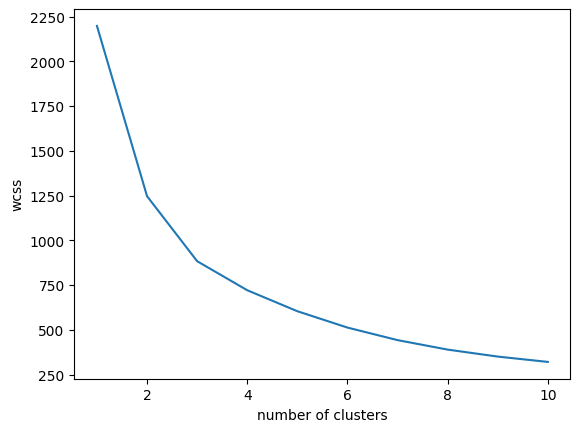

In [416]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel('wcss')
plt.show()

In [417]:
km=KMeans(n_clusters=4,n_init=20)

In [419]:
km.fit(x)

KMeans(n_clusters=4, n_init=20)

In [420]:
cluster_labels=km.predict(x)

In [421]:
cluster_labels

array([1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 3, 1, 0, 1,
       0, 1, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2,
       3, 2, 0, 3, 1, 3, 1, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 3, 3, 2, 0, 2, 3, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 2, 3, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       3, 2, 0, 3, 2, 2, 1, 2, 0, 0, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 2, 1,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 3, 3, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 3, 0, 2, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 3, 0, 1, 3, 2, 2, 0, 0, 3, 2, 2, 0, 3, 0, 0,
       1, 2, 1, 2, 1, 0, 3, 0, 0, 2, 0, 0, 2, 3, 3, 2, 0, 2, 2, 3, 2, 0,
       0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2,

In [424]:
pd.Series(cluster_labels).value_counts()

0    192
1    113
2     74
3     61
dtype: int64

In [425]:
from sklearn.metrics import silhouette_score

In [426]:
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3068570876352


Based on the Silhouette Scores alone, it appears that clustering on the original data without PCA preprocessing results in better-defined clusters.